<a href="https://colab.research.google.com/github/vishvas-chauhan/pickletoweb/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
#from keras.utils import to_categorical 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test)= cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
#look at the datatype
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#get the shape of array
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
#take a looking at image as array
index= 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

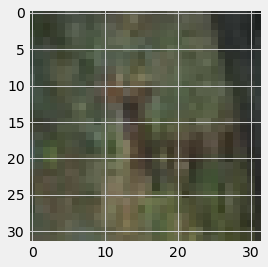

In [ ]:
#showimg as picture
img= plt.imshow(x_train[index])

In [ ]:
#get label of image
print('the img label is: ', y_train[index])

the img label is:  [4]


In [ ]:
#get image classification:
classification = ['airplane','automobile','bird','cat','deer',
                  'dog','frog','horse','ship','truck']
print('img class is:', classification[y_train[index][0]])

img class is: deer


In [ ]:
#convert the labels into a set of 10numbers to input into the neural networl
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#print the new label of the img above
print('one hot label is :', y_train_one_hot[index])

one hot label is : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#normalize the pixels to value between 0 to 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#create the model architecture 
model = Sequential()

#add the first layer
model.add(Conv2D(32,(5,5), activation='relu', input_shape= (32,32,3)))

#first pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))

#add another convolution layer
model.add(Conv2D(32,(5,5), activation='relu'))

#second pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))

#add a flattening layer
model.add(Flatten())

#add a layer with 500 neurons
model.add(Dense(500,activation='relu'))

#add a drop out layer with 50%
model.add(Dropout(0.5))

#add a layer with 250 neurons
model.add(Dense(250,activation='relu'))

#add a layer with 10 neurons because we have 10 classifications
model.add(Dense(10,activation='softmax'))



In [ ]:
#complie model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
x_train.shape, y_train.shape,y_test_one_hot.shape

((50000, 32, 32, 3), (50000, 1), (10000, 10))

In [ ]:
#train the model
hist= model.fit(x_train,y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split =0.2)


Epoch 1/10
157/157 [==============================] - 56s 324ms/step - loss: 2.2417 - accuracy: 0.1410 - val_loss: 2.0432 - val_accuracy: 0.2442
Epoch 2/10
157/157 [==============================] - 49s 315ms/step - loss: 1.9881 - accuracy: 0.2654 - val_loss: 1.9001 - val_accuracy: 0.3065
Epoch 3/10
157/157 [==============================] - 49s 315ms/step - loss: 1.8914 - accuracy: 0.3048 - val_loss: 1.8192 - val_accuracy: 0.3398
Epoch 4/10
157/157 [==============================] - 50s 316ms/step - loss: 1.8130 - accuracy: 0.3404 - val_loss: 1.7435 - val_accuracy: 0.3646
Epoch 5/10
157/157 [==============================] - 50s 317ms/step - loss: 1.7482 - accuracy: 0.3663 - val_loss: 1.6717 - val_accuracy: 0.3987
Epoch 6/10
157/157 [==============================] - 50s 316ms/step - loss: 1.6953 - accuracy: 0.3854 - val_loss: 1.6405 - val_accuracy: 0.4102
Epoch 7/10
157/157 [==============================] - 50s 316ms/step - loss: 1.6668 - accuracy: 0.3964 - val_loss: 1.5971 - val_ac

In [ ]:
#evaluate the model using the test data set 
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 12ms/step - loss: 1.5281 - accuracy: 0.4549


0.45489999651908875

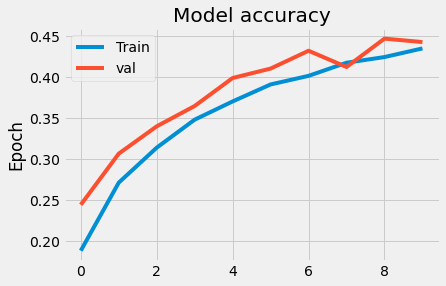

In [ ]:
#visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Epoch')
plt.legend(['Train','val'], loc= 'upper left')
plt.show()

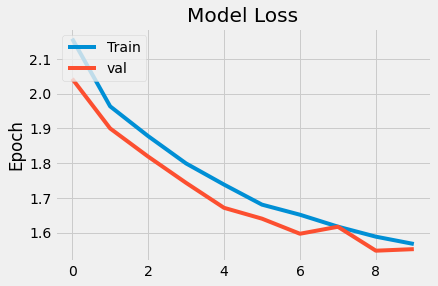

In [ ]:
#visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Epoch')
plt.legend(['Train','val'], loc= 'upper left')
plt.show()

In [ ]:
from google.colab import files 
files.upload()

In [ ]:
new_image = plt.imread('xyz.jpg')
img = plt.imshow(new_image)

In [ ]:
#resize the image
from skimage.transform import resize 
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)


In [ ]:
#get the models predictions
predictions = model.predict(np.array([resized_image]))
#show the predictions
predictions


In [ ]:
#sort the predictionsfrom least to greatest 
list_index = [0,1,2,3,4,5,6,7,8,9]
x= predictions remove # after


In [ ]:
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp 

#show the sorted labels in order
print(list_index)

In [ ]:
for i in range(5):
  print(classification[list_index[i]], ':',round(predictions[0][list_index[i]*100, '%')

airplane
automobile
bird
cat
deer
